# **Advanced Data Visualisation**

## Objectives

* Analyze Key Performance Metrics – Identify which stats (e.g., striking accuracy, takedown defense) impact win percentage.

- Compare Fighter Attributes – Examine how physical attributes like reach-to-height ratio affect success in fights.

- Test Hypotheses – Use statistical tests (T-tests) to validate claims, such as whether heavyweights have a lower win percentage.

- Visualize Fighter Trends – Create clear, advanced visualizations to compare top fighters and uncover patterns in fighting styles.




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [21]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects\\Fighter-Statistical-Data'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [22]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [23]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects'

---

# Preparing Data for this notebook

---

Loading in the dataset, and ensuring it is ready before creating visualisations

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

file_path = r"C:\Users\Seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data/ufc-fighters-statistics.csv"
df = pd.read_csv(file_path)   #loading in the dataset




In [25]:
cols_to_fill = [
    "significant_striking_accuracy",
    "significant_strike_defence",
    "average_takedowns_landed_per_15_minutes",
    "takedown_accuracy",
    "takedown_defense",
    "average_submissions_attempted_per_15_minutes"
]

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())  # Reassign the column




In [26]:
df["height_cm"] = df.groupby("weight_in_kg")["height_cm"].transform(lambda x: x.fillna(x.mean()))

df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))


In [27]:
df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))

df["height_cm"] = df["height_cm"].fillna(df["height_cm"].median())


In [28]:
# Convert date column if applicable
if "date_of_birth" in df.columns:
    df["age"] = 2024 - pd.to_datetime(df["date_of_birth"], errors="coerce").dt.year

# Calculate Reach-to-Height Ratio
df["reach_to_height"] = df["reach_in_cm"] / df["height_cm"]

---

# Advanced Data Visualisation

---

c:\Users\seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


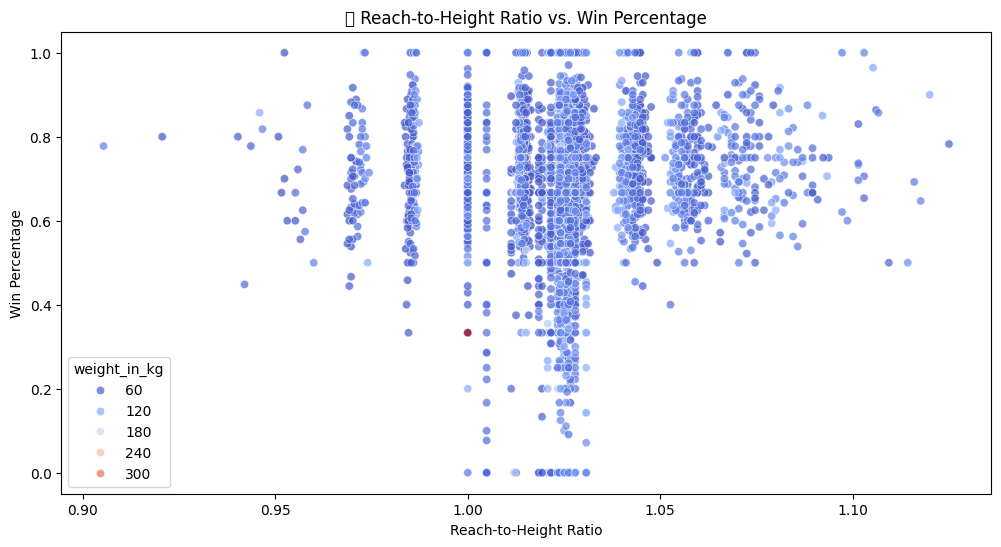

In [30]:
# Calculate reach-to-height ratio
df["reach_height_ratio"] = df["reach_in_cm"] / df["height_cm"]

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["reach_height_ratio"], y=df["win_percentage"], hue=df["weight_in_kg"], alpha=0.7, palette="coolwarm")
plt.xlabel("Reach-to-Height Ratio")
plt.ylabel("Win Percentage")
plt.title("📏 Reach-to-Height Ratio vs. Win Percentage")
plt.show()

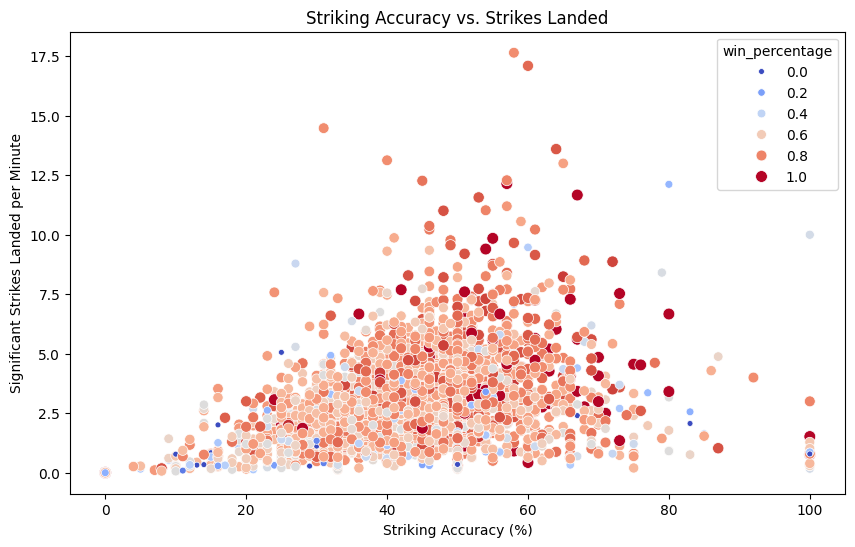

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="significant_striking_accuracy", y="significant_strikes_landed_per_minute",
                hue="win_percentage", size="win_percentage", palette="coolwarm", data=df)
plt.xlabel("Striking Accuracy (%)")
plt.ylabel("Significant Strikes Landed per Minute")
plt.title("Striking Accuracy vs. Strikes Landed")
plt.show()


C:\Users\seebi\AppData\Local\Temp\ipykernel_8812\1186081526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weight_in_kg", y="wins", data=finishing_rates, palette="coolwarm")


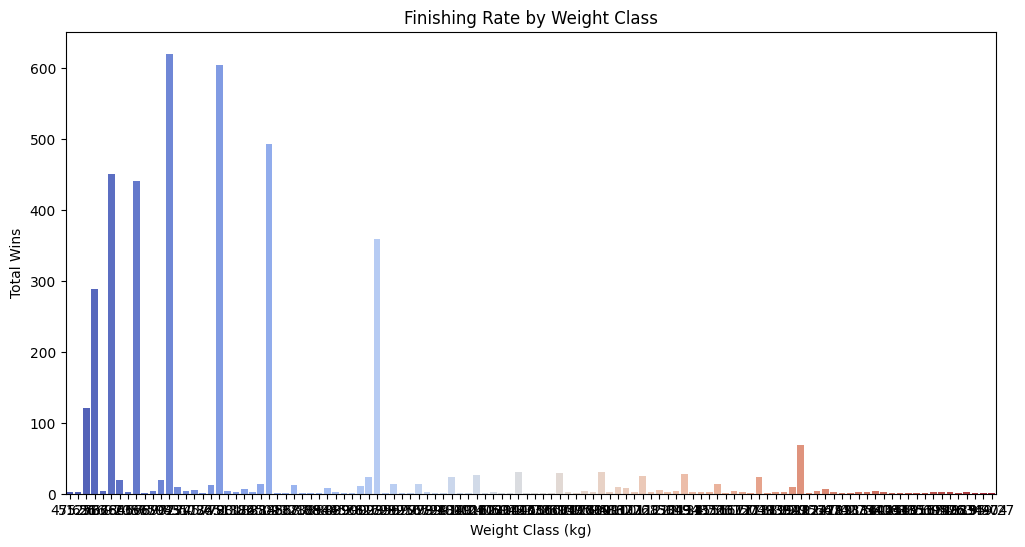

In [34]:
finishing_rates = df.groupby("weight_in_kg")["wins"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="weight_in_kg", y="wins", data=finishing_rates, palette="coolwarm")
plt.xlabel("Weight Class (kg)")
plt.ylabel("Total Wins")
plt.title("Finishing Rate by Weight Class")
plt.show()


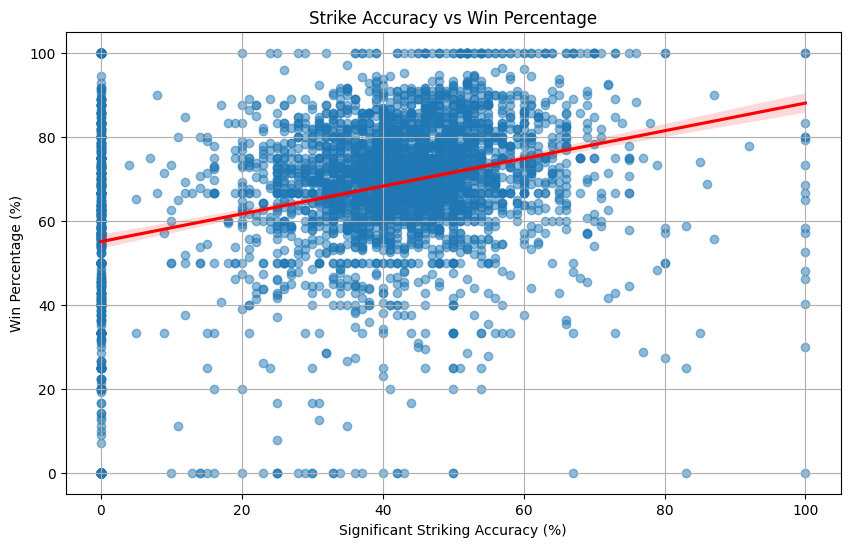

T-Test Results: t-statistic = 17.39, p-value = 0.0000
Conclusion: Statistically significant difference. Higher strike accuracy leads to higher win percentage.


In [35]:
from scipy.stats import ttest_ind

# Ensure required columns exist
if "significant_striking_accuracy" not in df.columns or "wins" not in df.columns or "losses" not in df.columns:
    raise ValueError("Required columns missing from dataset")

# Calculate win percentage
df["win_percentage"] = df["wins"] / (df["wins"] + df["losses"]) * 100

# Remove fighters with no recorded wins or losses
df = df.dropna(subset=["win_percentage", "significant_striking_accuracy"])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df["significant_striking_accuracy"], y=df["win_percentage"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Significant Striking Accuracy (%)")
plt.ylabel("Win Percentage (%)")
plt.title("Strike Accuracy vs Win Percentage")
plt.grid(True)
plt.show()

# Statistical Test: Split into high and low accuracy groups
median_accuracy = df["significant_striking_accuracy"].median()
high_accuracy = df[df["significant_striking_accuracy"] >= median_accuracy]["win_percentage"]
low_accuracy = df[df["significant_striking_accuracy"] < median_accuracy]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(high_accuracy, low_accuracy, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Higher strike accuracy leads to higher win percentage.")
else:
    print("Conclusion: No significant difference found. Strike accuracy may not strongly impact win percentage.")

For my first hypotheses 'Fighters with a higher strike accuracy have a higher win percentage', I wanted to analyse the trend between this, and as you can see that the red slope above indicates that my hypotheses is correct.

Because the p-value is practically 0, we can infer from this data that striking accuracy plays a major role in winning fights, as this further suggests that fighters who are consistently landing precise strikes tend to have better win rates.

C:\Users\seebi\AppData\Local\Temp\ipykernel_8812\3853771992.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.qcut(df["significant_strikes_absorbed_per_minute"], q=3, labels=["Low Absorption", "Medium Absorption", "High Absorption"]),


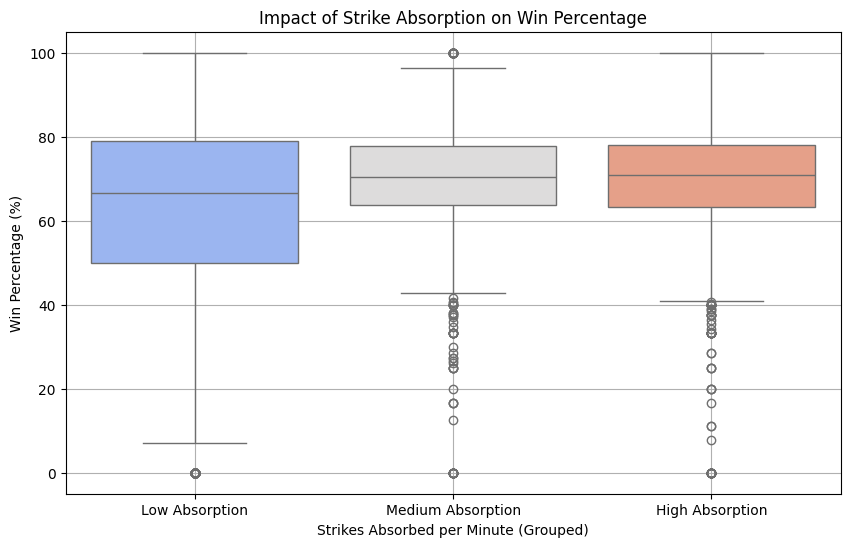

T-Test Results: t-statistic = -7.26, p-value = 0.0000
Conclusion: Statistically significant difference. Fighters who absorb fewer strikes have higher win rates.


In [36]:
# Calculate win percentage
df["win_percentage"] = df["wins"] / (df["wins"] + df["losses"]) * 100

# Remove NaN values
df = df.dropna(subset=["win_percentage", "significant_strikes_absorbed_per_minute"])

# Box plot of win percentage grouped by strike absorption level
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(df["significant_strikes_absorbed_per_minute"], q=3, labels=["Low Absorption", "Medium Absorption", "High Absorption"]),
            y=df["win_percentage"], palette="coolwarm")
plt.xlabel("Strikes Absorbed per Minute (Grouped)")
plt.ylabel("Win Percentage (%)")
plt.title("Impact of Strike Absorption on Win Percentage")
plt.grid(True)
plt.show()

# Statistical Test: Split into high and low absorption groups
median_absorption = df["significant_strikes_absorbed_per_minute"].median()
low_absorption = df[df["significant_strikes_absorbed_per_minute"] <= median_absorption]["win_percentage"]
high_absorption = df[df["significant_strikes_absorbed_per_minute"] > median_absorption]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(low_absorption, high_absorption, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Fighters who absorb fewer strikes have higher win rates.")
else:
    print("Conclusion: No significant difference found. Absorbing fewer strikes does not strongly impact win percentage.")


From our second hypotheses 'Fighters who absorb fewer significant strikes per minute have better win rates'; We can see that it was proved correct as the p-value is also 0.

This can also infer that absorbing fewer significant strikes is strongly linked to winning fights, and this could be due to other factors such as footwork, better defence and head movement. We can also infer from this data that fighters with a high absorption rate of significant strikes may get overwhelmed which could lead to a higher rate of losses.

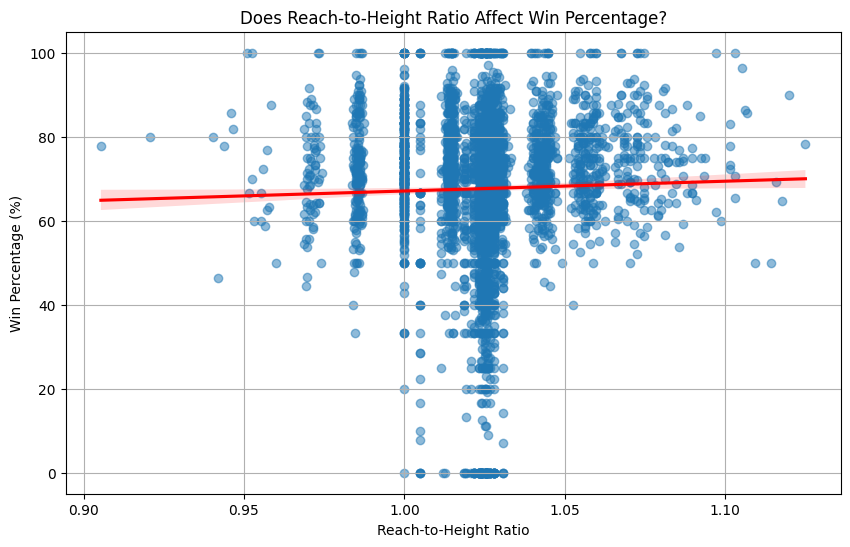

T-Test Results: t-statistic = 0.28, p-value = 0.7780
Conclusion: No significant difference found. Reach-to-height ratio may not strongly impact win percentage.


In [37]:
# Ensure required columns exist
if "reach_in_cm" not in df.columns or "height_cm" not in df.columns or "wins" not in df.columns or "losses" not in df.columns:
    raise ValueError("Required columns missing from dataset")

# Calculate reach-to-height ratio
df["reach_height_ratio"] = df["reach_in_cm"] / df["height_cm"]

# Calculate win percentage
df["win_percentage"] = df["wins"] / (df["wins"] + df["losses"]) * 100

# Remove NaN values
df = df.dropna(subset=["win_percentage", "reach_height_ratio"])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df["reach_height_ratio"], y=df["win_percentage"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Reach-to-Height Ratio")
plt.ylabel("Win Percentage (%)")
plt.title("Does Reach-to-Height Ratio Affect Win Percentage?")
plt.grid(True)
plt.show()

# Statistical Test: Split into high and low ratio groups
median_ratio = df["reach_height_ratio"].median()
high_ratio = df[df["reach_height_ratio"] >= median_ratio]["win_percentage"]
low_ratio = df[df["reach_height_ratio"] < median_ratio]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(high_ratio, low_ratio, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Fighters with a higher reach-to-height ratio tend to have a higher win percentage.")
else:
    print("Conclusion: No significant difference found. Reach-to-height ratio may not strongly impact win percentage.")


Due to its p-value being 0.7780, we can infer from this data that my third hypotheses which was 'Fighters with a higher reach-to-height ratio tend to have a higher win percentage' was rejected which can explain that reach-to-height ratio does not significantly impact win percentage.

The findings also suggest that a longer reach relative to one's height does not automatically translate to winning fights, as other factors such as fight iq, experience, striking accuracy and speed can come into play and affect results.

C:\Users\seebi\AppData\Local\Temp\ipykernel_8812\2714530171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["is_heavyweight"], y=df["win_percentage"], palette=["blue", "red"])


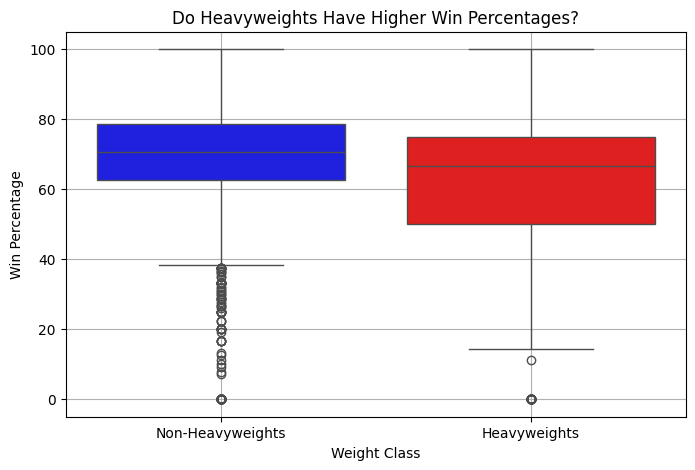

T-Test Results: t-statistic = -7.57, p-value = 0.0000
Conclusion: Statistically significant difference. Heavyweights have a lower win percentage.


In [38]:
if "weight_in_kg" not in df.columns or "win_percentage" not in df.columns:
    raise ValueError("Required columns missing from dataset")

# Define heavyweight (typically 93 kg and above in MMA)
df["is_heavyweight"] = df["weight_in_kg"] >= 93

# Boxplot to visualize win percentage differences
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["is_heavyweight"], y=df["win_percentage"], palette=["blue", "red"])
plt.xticks([0, 1], ["Non-Heavyweights", "Heavyweights"])
plt.xlabel("Weight Class")
plt.ylabel("Win Percentage")
plt.title("Do Heavyweights Have Higher Win Percentages?")
plt.grid(True)
plt.show()

# Statistical Test: Compare win percentages between heavyweights and non-heavyweights
heavyweights = df[df["is_heavyweight"]]["win_percentage"]
non_heavyweights = df[~df["is_heavyweight"]]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(heavyweights, non_heavyweights, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Heavyweights have a lower win percentage.")
else:
    print("Conclusion: No significant difference found. Weight class does not significantly impact win percentage.")




The findings above from the T-test suggest that heavyweights have a lower win percentage and I came to this conclusion as the p-value is far below 0.05, this difference between heavyweight and non-heavyweights is stastically significant and not from random chance.

Reasons why this is possible could boil down to endurance and cardio issues, as heavyweights carry more mass and produce more mass, this leads to faster fatigue which is why most heavyweights struggle going the full 3/5 rounds when performing at their highest level as it takes more energy out of them compared to lighter fighters.

Another reason why this is true is because of their defensive vulnerabilities, as heavyweights absorb the more damaging strikes due to their division's high knockout rate and as they carry more mass, they also produce the most amount of damage; heavyweights also have slower reaction times and less mobility compared to lighter fighters making them easier targets for precise strikes.

C:\Users\seebi\AppData\Local\Temp\ipykernel_8812\870108106.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["high_takedown_defense"], y=df["win_percentage"], palette=["blue", "red"])


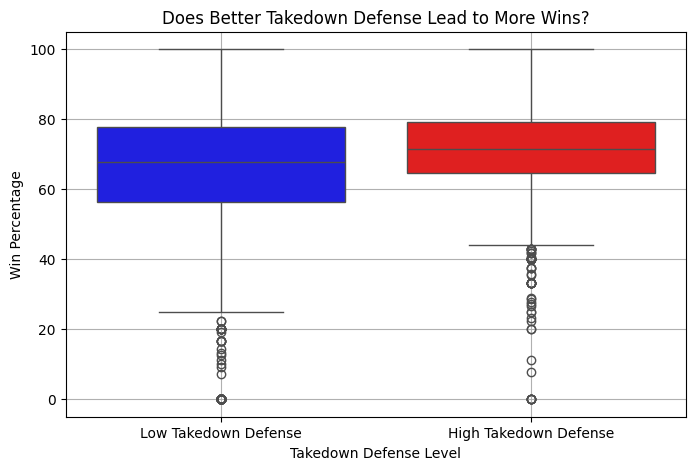

T-Test Results: t-statistic = 12.96, p-value = 0.0000
Conclusion: Statistically significant difference. Fighters with better takedown defense have a higher win percentage.


In [39]:
# Split fighters into high and low takedown defense groups
median_takedown_defense = df["takedown_defense"].median()
df["high_takedown_defense"] = df["takedown_defense"] >= median_takedown_defense

# Boxplot to visualize win percentage differences
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["high_takedown_defense"], y=df["win_percentage"], palette=["blue", "red"])
plt.xticks([0, 1], ["Low Takedown Defense", "High Takedown Defense"])
plt.xlabel("Takedown Defense Level")
plt.ylabel("Win Percentage")
plt.title("Does Better Takedown Defense Lead to More Wins?")
plt.grid(True)
plt.show()

# Statistical Test: Compare win percentages between high and low takedown defense groups
high_defense = df[df["high_takedown_defense"]]["win_percentage"]
low_defense = df[~df["high_takedown_defense"]]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(high_defense, low_defense, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Fighters with better takedown defense have a higher win percentage.")
else:
    print("Conclusion: No significant difference found. Takedown defense does not significantly impact win percentage.")


The findings above support my fifth hypotheses which was 'fighters with better takedown defense have a significantly higher win percentage', and we can come to this conclusion from the results of the T-test as the p-value is below 0.05 which means that the difference is significant and it wasn't by random chance.

Reasons why this hypotheses is correct can be because a high takedown defense rate can lead to a tactical edge, as a fighter can lsoe confidence when repeated takedowns fail and they are able to force the fight standing up to which they could have an advantage over.

Another reason why this hypotheses is true is because they are conserving more energy, as defending takedowns successfully which means fighters don't expend unnecessary energy scrambling nor getting back up to their feet; this furthermore allows them to be more effective over multiple rounds and maintain control of the fight.



---

# Conclusion and Next Steps

My next steps would be to 